# DA Módulo 3: Ejercicio de evaluación final

---

## Los Datos:

### Customer Flight Analysis.csv

- Loyalty Number: Este atributo representa un identificador único para cada cliente dentro del
programa de lealtad de la aerolínea. Cada número de lealtad corresponde a un cliente específico.
- Year: Indica el año en el cual se registraron las actividades de vuelo para el cliente.
- Month: Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.
- Flights Booked: Número total de vuelos reservados por el cliente en ese mes específico.
- Flights with Companions: Número de vuelos reservados en los cuales el cliente viajó con
acompañantes.
- Total Flights: El número total de vuelos que el cliente ha realizado, que puede incluir vuelos
reservados en meses anteriores.
- Distance: La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado
durante el mes.
- Points Accumulated: Puntos acumulados por el cliente en el programa de lealtad durante el mes,
con base en la distancia volada u otros factores.
- Points Redeemed: Puntos que el cliente ha redimido en el mes, posiblemente para obtener
beneficios como vuelos gratis, mejoras, etc.
- Dollar Cost Points Redeemed: El valor en dólares de los puntos que el cliente ha redimido durante
el mes.

---

### Customer Loyalty History.csv

- Loyalty Number: Identificador único del cliente dentro del programa de lealtad. Este número permite
correlacionar la información de este archivo con el archivo de actividad de vuelos.
- Country: País de residencia del cliente.
- Province: Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales
o estatales, como Canadá).
- City: Ciudad de residencia del cliente.
- Postal Code: Código postal del cliente.
- Gender: Género del cliente (ej. Male para masculino y Female para femenino).
- Education: Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para
estudios universitarios o técnicos, etc.).
- Salary: Ingreso anual estimado del cliente.
- Marital Status: Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para
divorciado, etc.).
- Loyalty Card: Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o
categorías dentro del programa de lealtad.
- CLV (Customer Lifetime Value): Valor total estimado que el cliente aporta a la empresa durante
toda la relación que mantiene con ella.
- Enrollment Type: Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).
- Enrollment Year: Año en que el cliente se inscribió en el programa de lealtad.
- Enrollment Month: Mes en que el cliente se inscribió en el programa de lealtad.
- Cancellation Year: Año en que el cliente canceló su membresía en el programa de lealtad, si aplica.
- Cancellation Month: Mes en que el cliente canceló su membresía en el programa de lealtad, si
aplica.

---

In [1]:
from src import soporte as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df1 = pd.read_csv("data/Customer Flight Activity.csv")
df2 = pd.read_csv("data/Customer Loyalty History.csv")

---

## Explorarión de problemas df1

In [3]:
# Este DataFrame nos muestra la actividad de vuelo de los clientes. 

df1.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
print(f"En este DataFrame hay: {df1.shape[0]} filas y {df1.shape[1]} columnas.")

En este DataFrame hay: 405624 filas y 10 columnas.


In [5]:
print("Customer Flight Analysis Info:")
df1.info()

Customer Flight Analysis Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [6]:
# Resumen estadistico de columnas numericas

print("Customer Flight Analysis Resumen de Estadistica:")
df1.describe()

Customer Flight Analysis Resumen de Estadistica:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [7]:
# Identificar valores nulos

print("Valores nulos en Customer Flight Analysis:")
df1.isnull().sum()

Valores nulos en Customer Flight Analysis:


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [8]:
# Identificar valores duplicados

print("Valores duplicados en Customer Flight Analysis:")
df1.duplicated().sum()

Valores duplicados en Customer Flight Analysis:


1864

---

## Exploración de problemas df2

In [9]:
# Este DataFrame nos muestra el historial de fidelizacion de clientes.

df2.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [10]:
print(f"En este DataFrame hay: {df2.shape[0]} filas y {df2.shape[1]} columnas.")

En este DataFrame hay: 16737 filas y 16 columnas.


In [11]:
print("Customer Loyalty History Info:")
df2.info()

Customer Loyalty History Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [12]:
# Resumen estadistico de columnas numericas

print("Customer Loyalty History Resumen de Estadistica:")
df2.describe()

Customer Loyalty History Resumen de Estadistica:


,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [13]:
# Identificar valores nulos

print("Valores nulos en Customer Loyalty History:")
df2.isnull().sum()

Valores nulos en Customer Loyalty History:


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [14]:
# Identificar valores duplicados

print("Valores duplicados en Customer Loyalty History:")
df2.duplicated().sum()

Valores duplicados en Customer Loyalty History:


0

---

## Unión de Tablas con INNER JOIN

In [15]:
# Utilizo INNER JOIN, combina registros de ambas tablas solo cuando existe una correspondencia exacta en la clave común (en este caso, Loyalty Number).                                               
# Te asegura que solo mantendrás clientes que aparecen en ambos conjuntos de datos.
# Ayuda a eliminar duplicados si hay registros redundantes en cualquiera de las tablas.
# Si hay filas con valores faltantes en la clave Loyalty Number, esas filas serán descartadas automáticamente.

union_df = pd.merge(df1, df2, on="Loyalty Number", how="inner")
union_df.head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
5,100018,2017,6,4,1,5,4330,433.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
6,100018,2017,7,10,0,10,3870,387.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
7,100018,2017,9,9,4,13,1651,165.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
8,100018,2017,8,10,5,15,4200,420.0,690,56,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
9,100018,2017,10,6,0,6,1032,103.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [16]:
print(f"En este DataFrame hay: {union_df.shape[0]} filas y {union_df.shape[1]} columnas.")

En este DataFrame hay: 405624 filas y 25 columnas.


In [17]:
union_df.isna().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

In [18]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [19]:
union_df.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

---

## Limpieza de Datos: Union_df

### Nulos:
- Salary                         102672
- Cancellation Month             355560
- Cancellation Year              355560

In [20]:
union_df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [21]:
# Rellenar los valores nulos en las columnas especificadas con la media para sacer el calculo aproximado de cada dato(SALARIO).

union_df['Salary'] = union_df['Salary'].fillna(union_df['Salary'].mean())

In [22]:
# Rellenar los valores nulos con la moda (más frecuente) de cada columna, ya que en teoria los años que se han cancelado los vuelos son rquivalentes a las cancelaciones existentes.
# Los valores faltantes no tienen un patrón claro.

union_df['Cancellation Month'] = union_df['Cancellation Month'].fillna(union_df['Cancellation Month'].mode()[0])
union_df['Cancellation Year'] = union_df['Cancellation Year'].fillna(union_df['Cancellation Year'].mode()[0])

In [23]:
print("Filas duplicados en union_df:")
union_df.duplicated().sum()

Filas duplicados en union_df:


1864

In [24]:
print("Filas duplicados en union_df:")
union_df[union_df.duplicated()]

Filas duplicados en union_df:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
937,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,79268.825953,Married,Aurora,6265.34,Standard,2017,1,2018.0,11.0
940,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,79268.825953,Married,Aurora,6265.34,Standard,2017,1,2018.0,11.0
942,101902,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,79268.825953,Married,Aurora,6265.34,Standard,2017,1,2018.0,11.0
950,101902,2017,7,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,79268.825953,Married,Aurora,6265.34,Standard,2017,1,2018.0,11.0
961,101902,2017,12,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,79268.825953,Married,Aurora,6265.34,Standard,2017,1,2018.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403863,947778,2018,8,0,0,0,0,0.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,77907.000000,Single,Nova,4049.42,Standard,2016,10,2017.0,6.0
403865,947778,2018,9,0,0,0,0,0.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,77907.000000,Single,Nova,4049.42,Standard,2016,10,2017.0,6.0
403867,947778,2018,10,0,0,0,0,0.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,77907.000000,Single,Nova,4049.42,Standard,2016,10,2017.0,6.0
403869,947778,2018,11,0,0,0,0,0.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,77907.000000,Single,Nova,4049.42,Standard,2016,10,2017.0,6.0


In [25]:
# Elimino las filas duplicadas.
union_df = union_df.drop_duplicates()

In [26]:
print("Filas duplicados en union_df:")
union_df.duplicated().sum()

Filas duplicados en union_df:


0

In [27]:
union_df.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
dtype: int64

In [28]:
union_df.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

## Ejercicios:

> Fase 1: Exploración y Limpieza

1. Exploración Inicial:

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
presencia de valores nulos y estadísticas básicas de las columnas involucradas.

- Une los dos conjuntos de datos de la forma más eficiente.

2. Limpieza de Datos:

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
datos) para garantizar la adecuación de los datos para el análisis estadístico.

---

In [29]:
union_df.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,2018.0,11.0


> Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
gráficas usando la mejor gráfica que consideres:

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

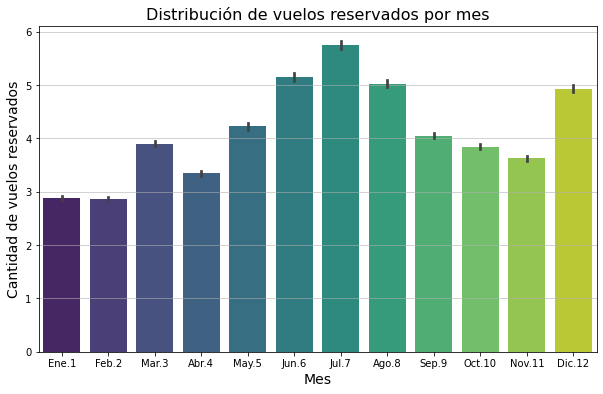

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Flights Booked', data=union_df, palette='viridis')

# Personalización del gráfico
plt.title('Distribución de vuelos reservados por mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de vuelos reservados', fontsize=14)
plt.xticks(ticks=range(12), labels=['Ene.1', 'Feb.2', 'Mar.3', 'Abr.4', 'May.5', 'Jun.6', 'Jul.7', 'Ago.8', 'Sep.9', 'Oct.10', 'Nov.11', 'Dic.12'])
plt.grid(axis='y', linestyle='-', alpha=0.7)

In [31]:
# En esta grafica se puede observar que hay mas vuelos reservados en los meses de: junio, julio, agosto y diciembre (temporeda alta)
# y que en el resto de meses hay una bajada considerable de reservas.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

Text(0, 0.5, 'Distance')

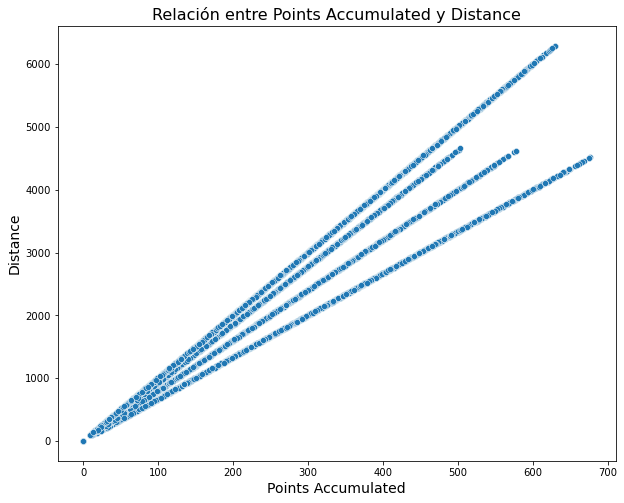

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Points Accumulated', y='Distance', data=union_df)

# Añadir título y etiquetas
plt.title('Relación entre Points Accumulated y Distance', fontsize=16)
plt.xlabel('Points Accumulated', fontsize=14)
plt.ylabel('Distance', fontsize=14)


In [33]:
# En este dataframe se puede obserbar que a cuanta mas distancia mas puntos acumulados.

In [39]:
union_df.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

3. ¿Cuál es la distribución de los clientes por provincia o estado?

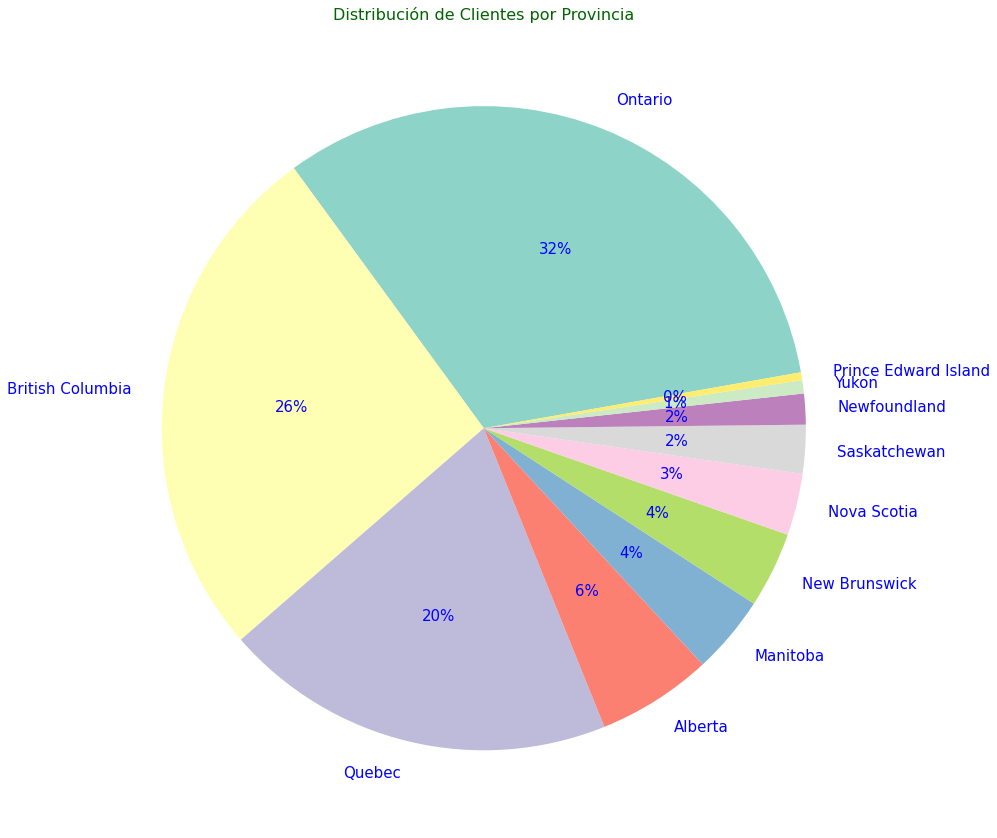

In [62]:
plt.figure(figsize=(14, 15))
union_df['Province'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=10, cmap='Set3', textprops={'color': 'blue', 'fontsize': 15})

# Personalizar gráfica
plt.title('Distribución de Clientes por Provincia', fontsize=16, color='darkgreen')
plt.ylabel('')  # Quitar etiqueta del eje y para claridad

# Mostrar gráfica
plt.tight_layout()

In [ ]:
# En este grafico podemos obserbar que hay mas clientes en: British Columbia, Quebec y Ontario, que en el resto de provincias.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

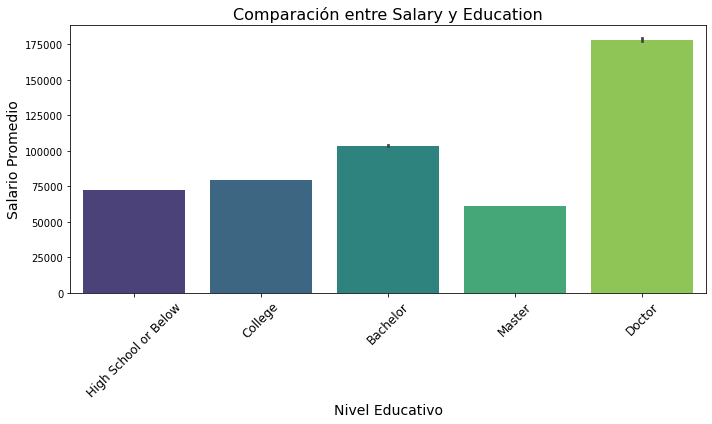

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Salary', data=union_df, palette='viridis')

# Personalizar la gráfica
plt.title('Comparación entre Salary y Education', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=14)
plt.ylabel('Salario Promedio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.xticks(ticks=range(5), labels=[ 'High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.tight_layout()

In [ ]:
# Aparentemente a cuanto mas nivel de estudios mas salario, pero la regla se rompe entre licenciatura y master.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

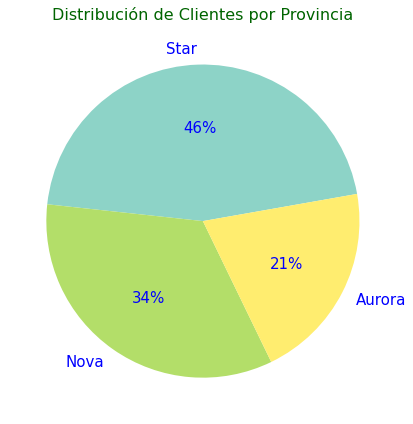

In [79]:

plt.figure(figsize=(8, 6))
union_df['Loyalty Card'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=10, cmap='Set3', textprops={'color': 'blue', 'fontsize': 15})

# Personalizar gráfica
plt.title('Distribución de Clientes por Provincia', fontsize=16, color='darkgreen')
plt.ylabel('')  # Quitar etiqueta del eje y para claridad

# Mostrar gráfica
plt.tight_layout()
 

In [ ]:
# En esta grafica podemos obserbar que la mayor parte de clientes en conjunto tienen la tajerta Star 
# Otra observacion seria que juntando la cantidad de personas que tiene la tarjeta Aurora y Nova superan en conjunto a los que tienen la tajeta star.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [81]:
union_df.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [87]:
union_df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

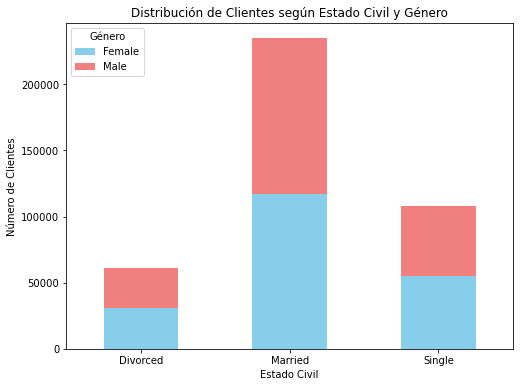

In [90]:
tabla_contingencia = pd.crosstab(union_df['Marital Status'], union_df['Gender'])

# Paso 3: Graficar la distribución con un gráfico de barras apiladas
tabla_contingencia.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightcoral'])

# Títulos y etiquetas
plt.title('Distribución de Clientes según Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)  # Para que las etiquetas del eje X no se roten
plt.legend(title='Género', loc='upper left')

---

## BONUS 

> Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberas seguir son:

1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.

2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada
grupo.

3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles educativos.